In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-california-wildfire-data/POSTFIRE_MASTER_DATA_SHARE_140463065990229786.geojson
/kaggle/input/the-california-wildfire-data/b8aeb030-140d-43d2-aa29-1a80862e3d62.csv


In [2]:

# Load GeoJSON file
geo_data = gpd.read_file('/kaggle/input/the-california-wildfire-data/POSTFIRE_MASTER_DATA_SHARE_140463065990229786.geojson')

# Display the first few rows
print(geo_data.head())


   OBJECTID           DAMAGE  STREETNUMBER     STREETNAME STREETTYPE  \
0         1        No Damage        8376.0   Quail Canyon       Road   
1         2  Affected (1-9%)        8402.0   Quail Canyon       Road   
2         3        No Damage        8430.0  Quail Canyon        Road   
3         4        No Damage        3838.0    Putah Creek       Road   
4         5        No Damage        3830.0    Putah Creek       Road   

  STREETSUFFIX     CITY STATE  ZIPCODE CALFIREUNIT  ...  \
0         None  Winters    CA      NaN         LNU  ...   
1         None  Winters    CA      NaN         LNU  ...   
2         None  Winters    CA      NaN         LNU  ...   
3         None  Winters    CA      NaN         LNU  ...   
4         None  Winters    CA      NaN         LNU  ...   

  UTILITYMISCSTRUCTUREDISTANCE FIRENAME         APN ASSESSEDIMPROVEDVALUE  \
0                         None    Quail  0101090290              510000.0   
1                         None    Quail  0101090270       

> **Using geopandas for Quick Plots:**

<Axes: >

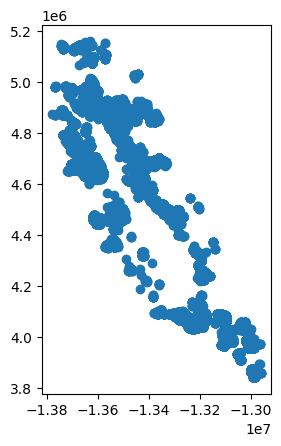

In [3]:
geo_data.plot()

In [4]:
pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 10.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


> **Plotting the Distribution of Damage:**

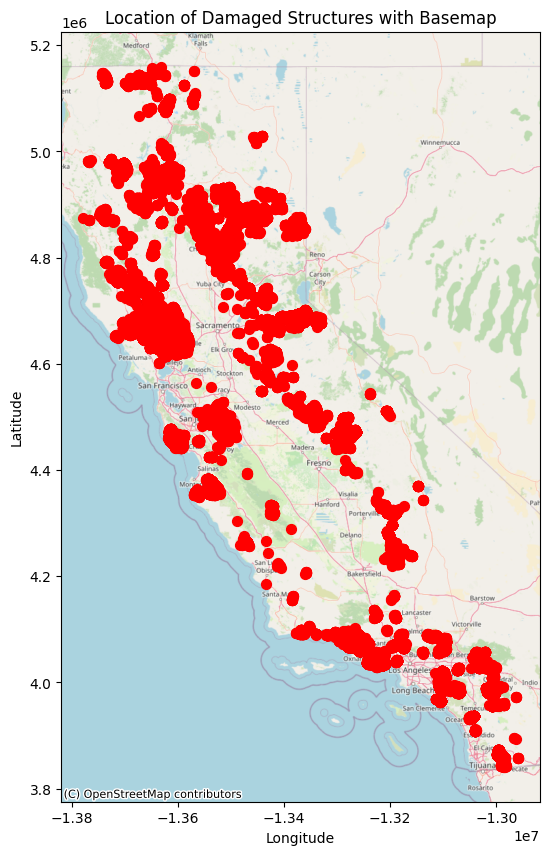

In [5]:
import contextily as ctx

# Ensure the data has a valid projection (e.g., Web Mercator)
geo_data = geo_data.to_crs(epsg=3857)

# Plot the damage points on top of the basemap
fig, ax = plt.subplots(figsize=(10, 10))

# Plot your geospatial data
geo_data.plot(ax=ax, color='red', markersize=50)

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize plot
plt.title("Location of Damaged Structures with Basemap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


> **Aggregating Data by Decades:**

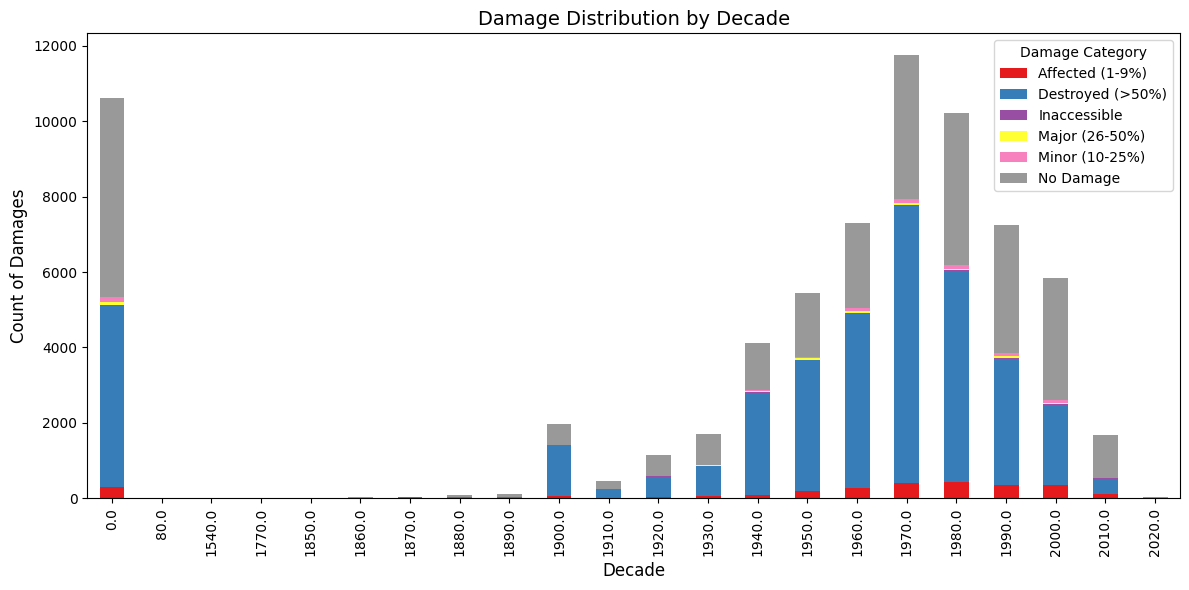

In [6]:
# Create a 'Decade' column by grouping the 'YEARBUILT' into decades
geo_data['Decade'] = (geo_data['YEARBUILT'] // 10) * 10

# Group data by Decade and DAMAGE, count occurrences
damage_by_decade = geo_data.groupby(['Decade', 'DAMAGE']).size().unstack().fillna(0)

# Plot stacked bar plot for damage distribution by Decade with 'Set1' color palette
damage_by_decade.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='Set1')

# Customize plot
plt.title("Damage Distribution by Decade", fontsize=14)
plt.xlabel("Decade", fontsize=12)
plt.ylabel("Count of Damages", fontsize=12)
plt.legend(title="Damage Category", fontsize=10)
plt.tight_layout()
plt.show()


[*********************100%***********************]  4 of 4 completed

yfinance is already installed.
pandas is already installed.
numpy is already installed.
matplotlib is already installed.
Available columns: MultiIndex([( 'Close',  'AAPL'),
            ( 'Close',  'AMZN'),
            ( 'Close', 'GOOGL'),
            ( 'Close',  'MSFT'),
            (  'High',  'AAPL'),
            (  'High',  'AMZN'),
            (  'High', 'GOOGL'),
            (  'High',  'MSFT'),
            (   'Low',  'AAPL'),
            (   'Low',  'AMZN'),
            (   'Low', 'GOOGL'),
            (   'Low',  'MSFT'),
            (  'Open',  'AAPL'),
            (  'Open',  'AMZN'),
            (  'Open', 'GOOGL'),
            (  'Open',  'MSFT'),
            ('Volume',  'AAPL'),
            ('Volume',  'AMZN'),
            ('Volume', 'GOOGL'),
            ('Volume',  'MSFT')],
           names=['Price', 'Ticker'])
Using 'Close' instead of 'Adj Close'.



[*********************100%***********************]  4 of 4 completed


Available columns: MultiIndex([( 'Close', 'BAC'),
            ( 'Close',   'C'),
            ( 'Close', 'JPM'),
            ( 'Close', 'WFC'),
            (  'High', 'BAC'),
            (  'High',   'C'),
            (  'High', 'JPM'),
            (  'High', 'WFC'),
            (   'Low', 'BAC'),
            (   'Low',   'C'),
            (   'Low', 'JPM'),
            (   'Low', 'WFC'),
            (  'Open', 'BAC'),
            (  'Open',   'C'),
            (  'Open', 'JPM'),
            (  'Open', 'WFC'),
            ('Volume', 'BAC'),
            ('Volume',   'C'),
            ('Volume', 'JPM'),
            ('Volume', 'WFC')],
           names=['Price', 'Ticker'])
Using 'Close' instead of 'Adj Close'.


[*********************100%***********************]  4 of 4 completed


Available columns: MultiIndex([( 'Close',  'BP'),
            ( 'Close', 'COP'),
            ( 'Close', 'CVX'),
            ( 'Close', 'XOM'),
            (  'High',  'BP'),
            (  'High', 'COP'),
            (  'High', 'CVX'),
            (  'High', 'XOM'),
            (   'Low',  'BP'),
            (   'Low', 'COP'),
            (   'Low', 'CVX'),
            (   'Low', 'XOM'),
            (  'Open',  'BP'),
            (  'Open', 'COP'),
            (  'Open', 'CVX'),
            (  'Open', 'XOM'),
            ('Volume',  'BP'),
            ('Volume', 'COP'),
            ('Volume', 'CVX'),
            ('Volume', 'XOM')],
           names=['Price', 'Ticker'])
Using 'Close' instead of 'Adj Close'.


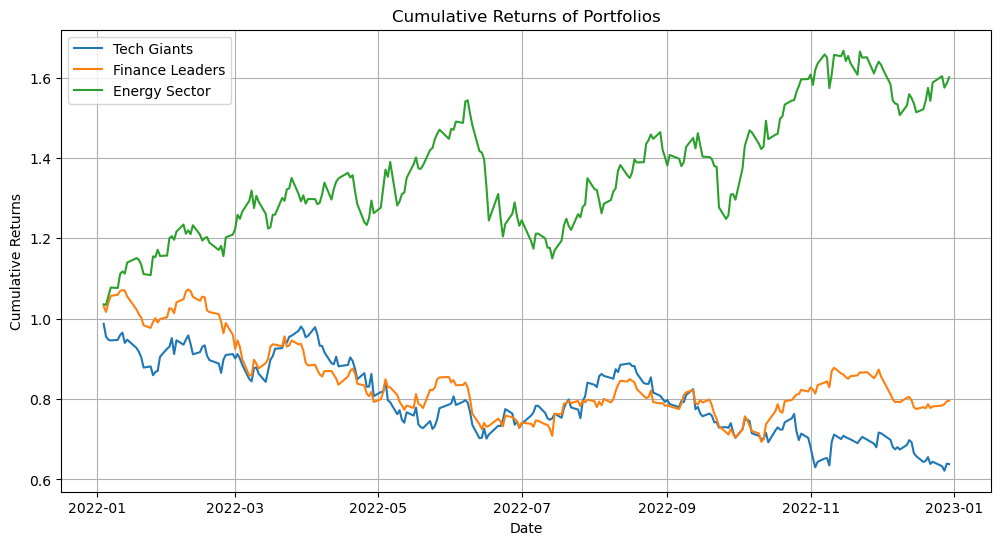


Portfolio Performance Metrics:
         Portfolio  Sharpe Ratio  Sortino Ratio  Total Return (%)
0      Tech Giants     -0.069012      -0.113352        -36.188390
1  Finance Leaders     -0.041066      -0.076136        -20.441375
2    Energy Sector      0.097206       0.144598         60.055217


In [5]:
# Step 1: Install necessary libraries (if needed)
import sys
import subprocess

def install_and_check_package(package_name):
    try:
        __import__(package_name)
        print(f"{package_name} is already installed.")
    except ImportError:
        print(f"{package_name} not found. Installing now...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
        print(f"{package_name} installed successfully!")

# Check for required libraries
install_and_check_package("yfinance")
install_and_check_package("pandas")
install_and_check_package("numpy")
install_and_check_package("matplotlib")

# Step 2: Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 3: Define helper functions
def calculate_sharpe_ratio(returns, risk_free_rate=0.01):
    """
    Calculate the Sharpe Ratio.
    Parameters:
        returns (pd.Series): Portfolio returns.
        risk_free_rate (float): Annual risk-free rate (default is 1%).
    Returns:
        float: Sharpe Ratio.
    """
    excess_returns = returns - risk_free_rate / 252
    return np.mean(excess_returns) / np.std(excess_returns)

def calculate_sortino_ratio(returns, risk_free_rate=0.01):
    """
    Calculate the Sortino Ratio.
    Parameters:
        returns (pd.Series): Portfolio returns.
        risk_free_rate (float): Annual risk-free rate (default is 1%).
    Returns:
        float: Sortino Ratio.
    """
    downside_returns = returns[returns < 0]
    excess_returns = returns - risk_free_rate / 252
    downside_std = np.std(downside_returns)
    return np.mean(excess_returns) / downside_std

def fetch_stock_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    print("Available columns:", data.columns)  # Inspect columns
    if "Adj Close" in data.columns:
        return data["Adj Close"]
    elif "Close" in data.columns:
        print("Using 'Close' instead of 'Adj Close'.")
        return data["Close"]
    else:
        raise ValueError("Neither 'Adj Close' nor 'Close' column is available in the fetched data.")

# Step 5: Main function to compare portfolios
def compare_portfolios(portfolios, start_date, end_date):
    """
    Compare multiple stock portfolios using financial ratios.
    Parameters:
        portfolios (dict): Dictionary of portfolio names and their stock tickers.
        start_date (str): Start date (YYYY-MM-DD).
        end_date (str): End date (YYYY-MM-DD).
    """
    plt.figure(figsize=(12, 6))
    portfolio_metrics = []

    for name, tickers in portfolios.items():
        # Fetch and calculate portfolio returns
        data = fetch_stock_data(tickers, start_date, end_date)
        daily_returns = data.pct_change().dropna()
        portfolio_returns = daily_returns.mean(axis=1)
        cumulative_returns = (1 + portfolio_returns).cumprod()

        # Plot cumulative returns
        plt.plot(cumulative_returns, label=name)

        # Calculate financial ratios
        sharpe_ratio = calculate_sharpe_ratio(portfolio_returns)
        sortino_ratio = calculate_sortino_ratio(portfolio_returns)
        total_return = cumulative_returns.iloc[-1] - 1

        # Save metrics
        portfolio_metrics.append({
            "Portfolio": name,
            "Sharpe Ratio": sharpe_ratio,
            "Sortino Ratio": sortino_ratio,
            "Total Return (%)": total_return * 100,
        })

    # Plot customization
    plt.title("Cumulative Returns of Portfolios")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns")
    plt.legend()
    plt.grid()
    plt.show()

    # Display metrics
    metrics_df = pd.DataFrame(portfolio_metrics)
    print("\nPortfolio Performance Metrics:")
    print(metrics_df)

# Step 6: Define portfolios and run the analysis
if __name__ == "__main__":
    portfolios = {
        "Tech Giants": ["AAPL", "MSFT", "GOOGL", "AMZN"],
        "Finance Leaders": ["JPM", "BAC", "WFC", "C"],
        "Energy Sector": ["XOM", "CVX", "BP", "COP"],
    }

    start_date = "2022-01-01"
    end_date = "2023-01-01"

    compare_portfolios(portfolios, start_date, end_date)



In [5]:
pip install yfinance


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip show yfinance


Name: yfinance
Version: 0.2.52
Summary: Download market data from Yahoo! Finance API
Home-page: https://github.com/ranaroussi/yfinance
Author: Ran Aroussi
Author-email: ran@aroussi.com
License: Apache
Location: /Users/softage/.local/lib/python3.12/site-packages
Requires: beautifulsoup4, frozendict, html5lib, lxml, multitasking, numpy, pandas, peewee, platformdirs, pytz, requests
Required-by: 
Note: you may need to restart the kernel to use updated packages.


> **Damage Trends Over Time:**
> *You can see how the total count of damages has changed over the decades. A rising trend might indicate an increase in damage incidents or more data being recorded over time.*

> *Categories like "Affected (51-100%)" increase in certain decades, suggests worsening conditions or more severe damage in those years.*